Author: Ashkan Nikfarjam

thid id general layout of school system in germany
source "https://www.studying-in-germany.org/german-education-system/#early-childhood-education"


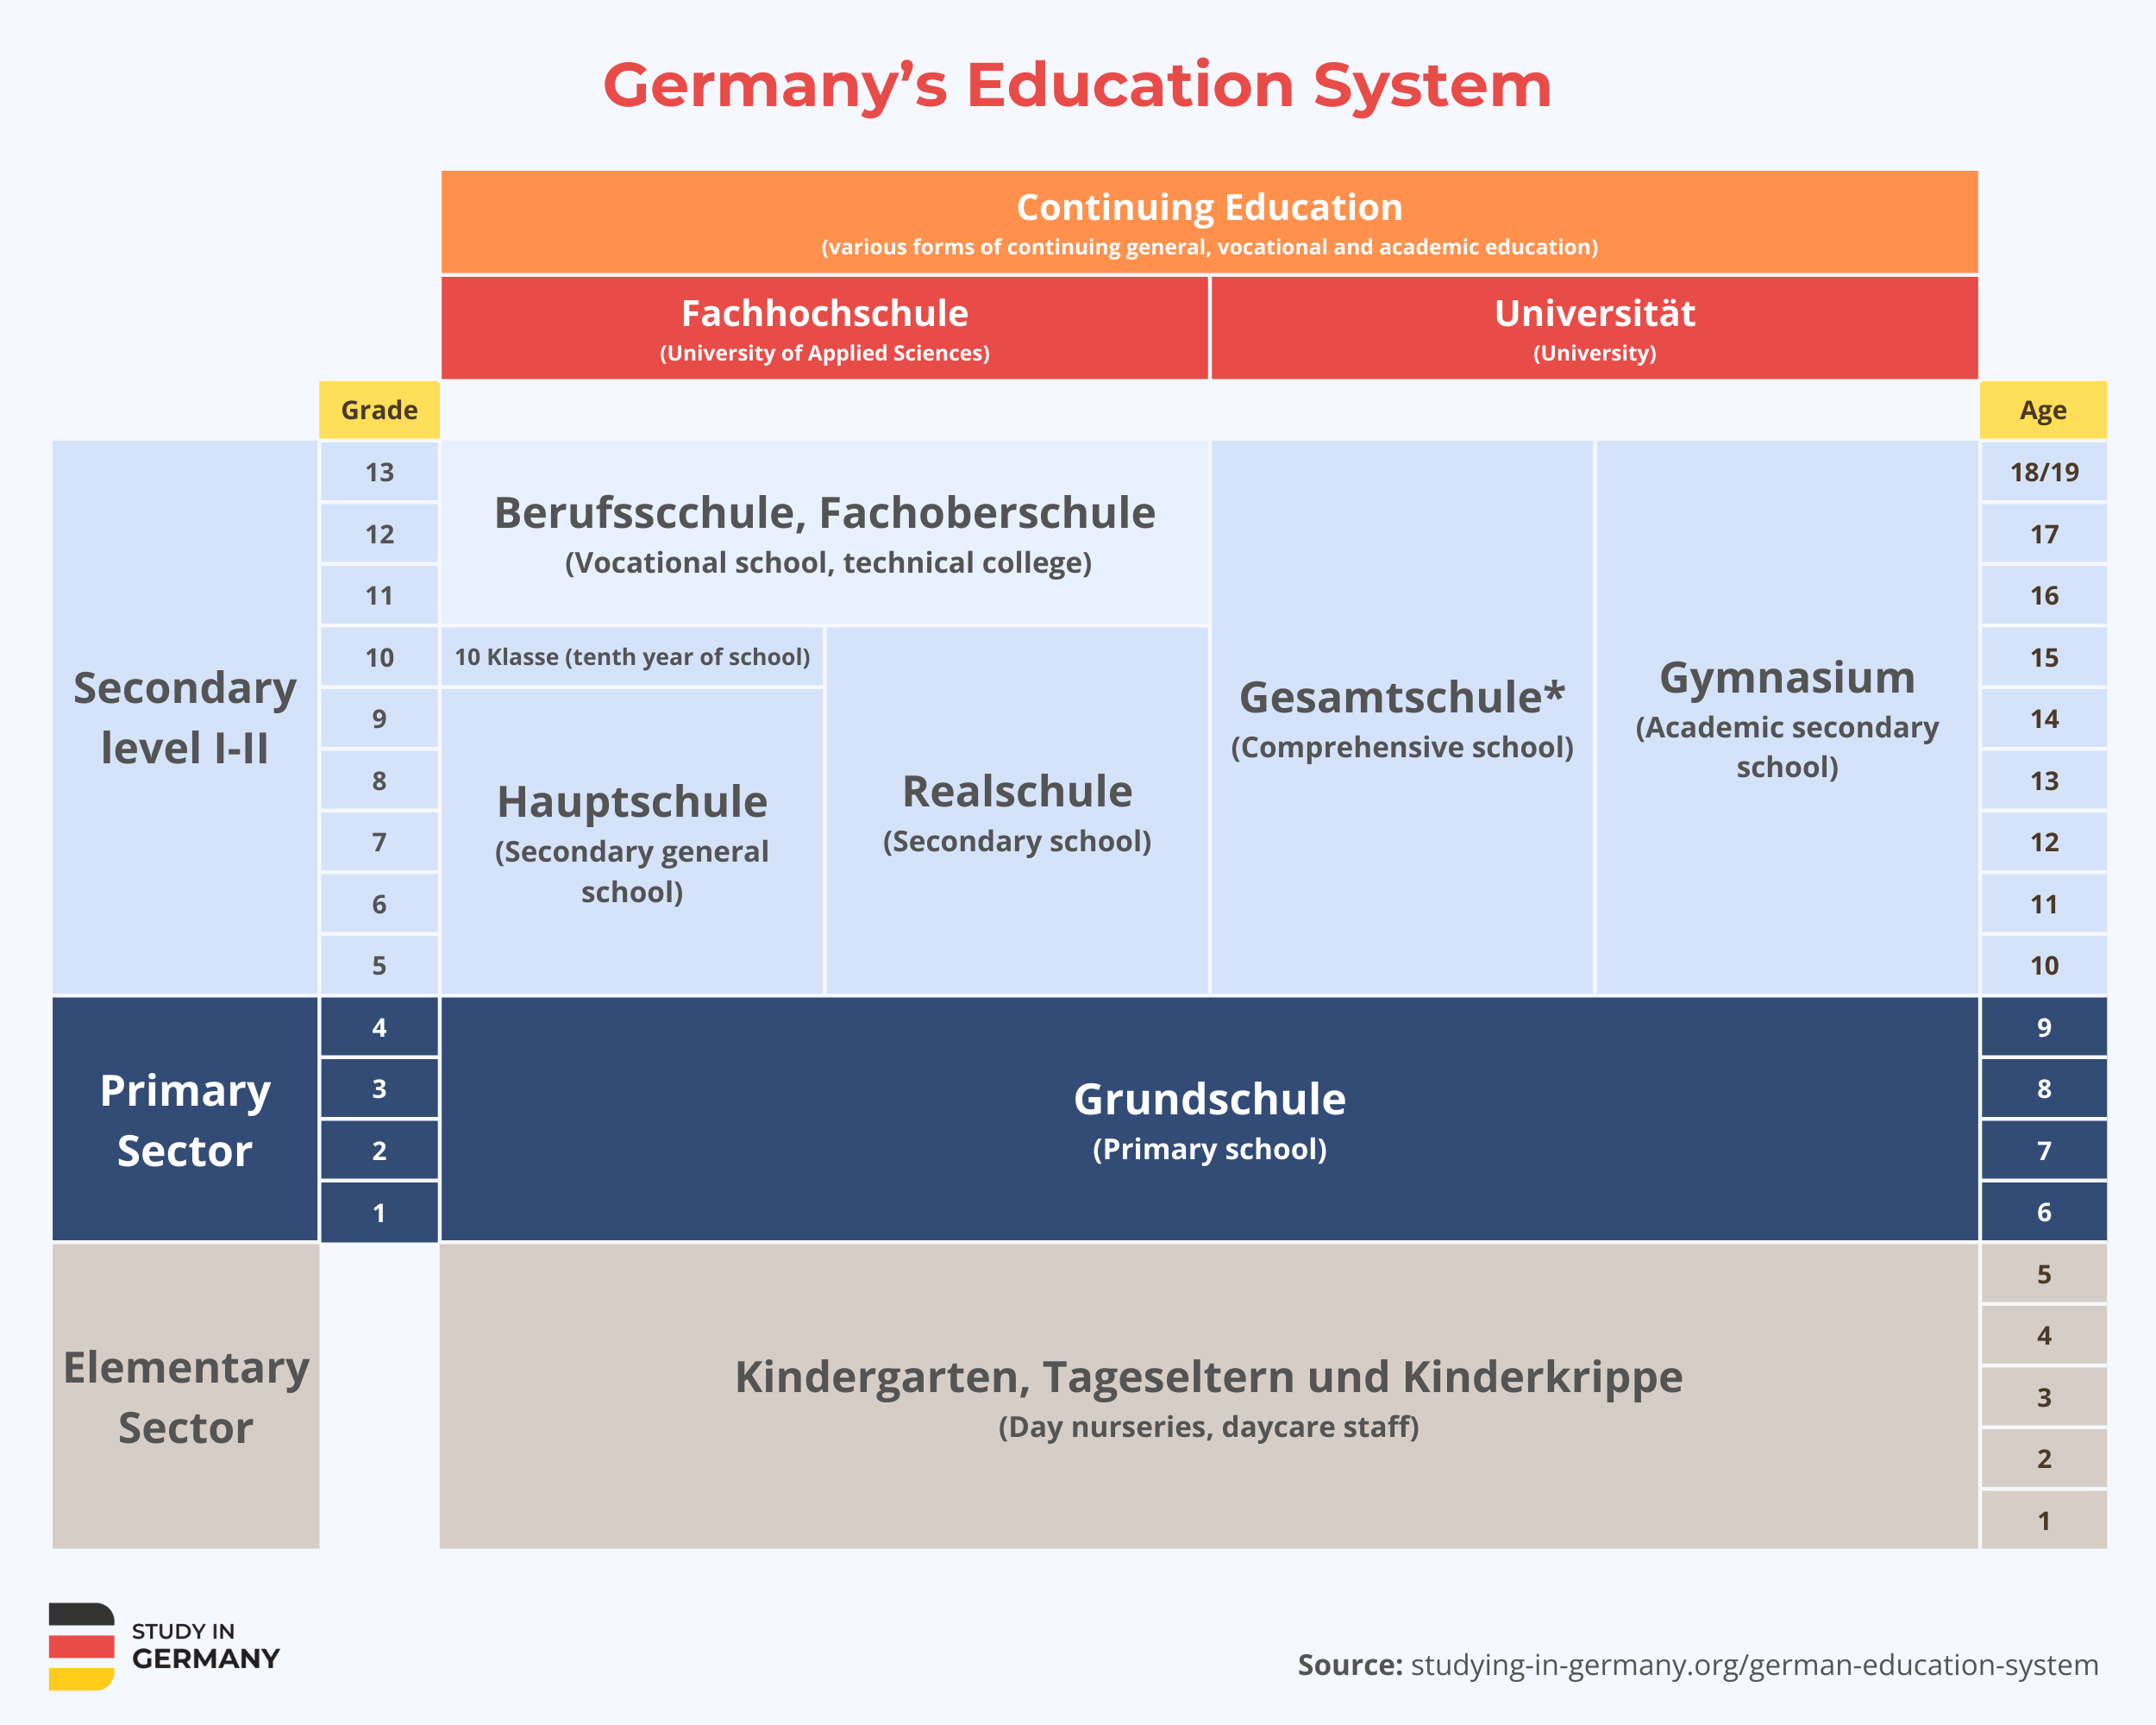

Early Childhood Education. This stage is optional but widely attended. Children typically start kindergarten at age three or four, focusing on socialization and early learning.

Primary Education. Beginning at age six and spanning grades 1 to 4 (or 1 to 6 in Berlin and Brandenburg), this stage marks the start of compulsory schooling and aids the transition from pre-school to formal education.

Secondary Education. Secondary education in Germany is divided into lower secondary (Sekundarstufe I) and upper secondary level (Sekundarstufe II), aiming to prepare students for vocational qualifications or higher education. 

Tertiary Education. Tertiary education in Germany includes universities, colleges, and vocational academies offering degrees and vocational qualifications. It’s highly respected for its academic quality and research opportunities.

Continuing Education. Continuing education in Germany offers non-degree courses and workshops for skill development and lifelong learning. It caters to diverse individuals and aims to enhance personal and professional growth.

In [1]:
#import requests
#eaders = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.1234.56 Safari/537.36'}
#response = requests.get(url, headers=headers)
#if response.status_code == 200:
#    soup = BeautifulSoup(response.content, 'html.parser')
#    print(soup.prettify())
#else:
#    print("cant reach", url)
#since my request failed/and since i could see the html file behind the webpage through google chrome dev tool
#I decided to download page as html now i use this approach
from bs4 import BeautifulSoup
#url = "https://research.com/university-rankings/best-global-universities/de"
with open("unversity.html", 'r') as file:
    soup = BeautifulSoup(file.read(), 'html.parser')
print(soup.prettify())



<!DOCTYPE html>
<!-- saved from url=(0068)https://research.com/university-rankings/best-global-universities/de -->
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta content="#007397" name="theme-color"/>
  <meta content="kf7RFShqDd6pEFRbroUhmwEITMkw4gog3D6yQR5w" name="csrf-token"/>
  <title>
   Best Universities in Germany 2023 Ranking | Research.com
  </title>
  <meta content="en_US" property="og:locale"/>
  <meta content="website" property="og:type"/>
  <meta content="Best Universities in Germany 2023 Ranking | Research.com" property="og:title"/>
  <meta content="https://research.com/university-rankings/best-global-universities/de" property="og:url"/>
  <meta content="Research.com" property="og:site_name"/>
  <meta content="Compare the best universities in the world for 2023. Discover Research.com annual Best Universities in Germany 2022" prop

In [2]:
script_tags = soup.find_all('script')
with open("university.json", 'w') as file:
    for tags in script_tags:
        file.write(tags.get_text())

List of all schools in germanny and their type: "https://en.wikipedia.org/wiki/List_of_schools_in_Germany"

In [3]:
#schools and accessobilities

import requests
url = "https://en.wikipedia.org/wiki/List_of_schools_in_Germany"
response = requests.get(url)

if response.status_code == 200:
    schools_soup = BeautifulSoup(response.content, 'html.parser')
else:
    print('Cant reach:', url)

In [4]:
#write our extracted codes to an html file so i can find out how to extract data i want from it
with open("schools.html", 'w') as file:
    file.write(schools_soup.prettify())

In [5]:
city_school_mapping = {}

# Find all <a> tags containing city names
city_tags = schools_soup.find_all('p')

for city_tag in city_tags:
    city_name = city_tag.text.strip()
    # Find the next <ul> tag after the city name
    next_ul = city_tag.find_next('ul')
    if next_ul:
        # Extract school names from <li> tags inside the <ul> tag
        school_names = [li_tag.text.strip() for li_tag in next_ul.find_all('li')]
        # Store city and its corresponding school names in the dictionary
        city_school_mapping[city_name] = school_names
del city_school_mapping['This is a list of schools in Germany sorted by Bundesland. See also List of universities in Germany.']
for city, schools in city_school_mapping.items():
    print("City:", city)
    print("Schools:", schools)
    print()



City: Achern
Schools: ['Gymnasium Achern']

City: Baden-Baden
Schools: ['Gymnasium Hohenbaden']

City: Bad Mergentheim
Schools: ['Deutschorden-Gymnasium', 'Wirtschafts-Gymnasium', 'Ernährungswissenschaftliches Gymnasium', 'Technisches-Gymnasium', 'Informationstechnisches-Gymnasium', 'Kopernikus-Realschule', 'Grund/Realschule-St.Bernhardt', 'Internationales Wirtschaftsgymnasium', 'Haus und Landwirtschaftliche Schule', 'Lorenz Fries Sonderschule', 'Eduard Mörike Hauptschule', 'Grund/Hauptschule Ottmar Schönhut Wachbach', 'Grundschule Stadtmitte', 'Grundschule am Kirchberg', 'Grundschule Stuppach/Neunkirchen', 'Grundschule Edelfingen', 'Grundschule Markelsheim', 'Abendrealschule', 'Kolping Berufskolleg', 'Fachschule für Physiotherapie', 'Bischöfliches Internat "Maria hilf"']

City: Bad Säckingen
Schools: ['Joseph Victor von Scheffel-Gymnasium']

City: Bammental
Schools: ['Gymnasium Bammental']

City: Bernkastel Kues
Schools: ['Nikolaus-von-Kues-Gymnasium']

City: Bretten
Schools: ['Melanc

now we can mark this dictionary as master data for schools and now can aggregate is as many ways as we want

In [6]:
#example

import pandas as pd

pd_dic = {key:len(value) for key,value in city_school_mapping.items()}
pd_city_lst = [key for key in pd_dic.keys()]
pd_num_lst = [value for value in pd_dic.values()]
schools_pd = pd.DataFrame({'city': pd_city_lst, 'Number of schools': pd_num_lst})
schools_pd.head()

,city,Number of schools
0,Achern,1
1,Baden-Baden,1
2,Bad Mergentheim,21
3,Bad Säckingen,1
4,Bammental,1


In [7]:
schools_pd.to_csv("shools.csv", index=False)

since the name of the city doesnt match the geodata set i have i came cross an algorithm like Levenshtein distance that does string matching. I learned that i could use a python library called fuzzywuzzy to help me achive that.

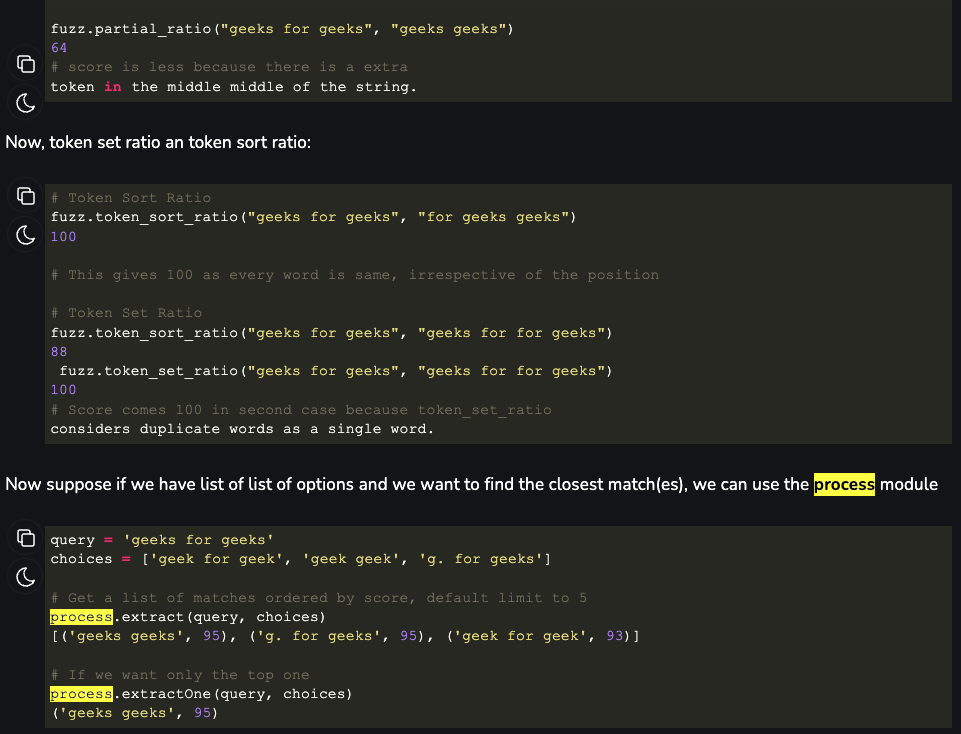



In [8]:
from fuzzywuzzy import process
german_city = pd.read_csv("../German cities.csv")
german_city.head()
real_city_lst = german_city.city.to_list()
real_city_lst
def find_match(city, choices):
    return process.extractOne(city, choices)[0]
test_pd = schools_pd.copy()
test_pd['city']= test_pd.city.apply(lambda x: find_match(x, real_city_lst))

test_pd.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


,city,Number of schools
0,Aachen,1
1,Wiesbaden,1
2,Rosenheim,21
3,Bad Soden am Taunus,1
4,Hamm,1


In [9]:
schools_pd.head()

,city,Number of schools
0,Achern,1
1,Baden-Baden,1
2,Bad Mergentheim,21
3,Bad Säckingen,1
4,Bammental,1


In [10]:
test_pd.to_csv("matchedCitySchools.csv", index=False)